In [229]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [230]:
df = pd.read_csv(r'data/sl_rent_price_data.csv')
df

,ad_added_date,district,suburb,bedrooms,bathrooms,house_size,land_size,price
0,2024-12-15,Colombo,Mount Lavinia,5,4,"2,800.0 sqft",8.0 perches,"320,000 /month"
1,2024-12-15,Colombo,Mount Lavinia,2,2,"1,000.0 sqft",10.0 perches,"80,000 /month"
2,2024-12-15,Colombo,Dehiwala,5,5,"7,000.0 sqft",15.0 perches,"700,000 /month"
3,2024-12-15,Colombo,Malabe,5,4,"3,600.0 sqft",22.0 perches,"120,000 /month"
4,2024-12-15,Colombo,Battaramulla,5,3,"3,000.0 sqft",17.0 perches,"350,000 /month"
...,...,...,...,...,...,...,...,...
4634,NaN,Colombo,Talawatugoda,5,4,"4,500.0 sqft",11.0 perches,"250,000 /month"
4635,NaN,Colombo,Colombo 3,4,3,"3,250.0 sqft",11.0 perches,"400,000 /month"
4636,NaN,Colombo,Colombo 5,3,4,"2,600.0 sqft",7.5 perches,"600,000 /month"
4637,NaN,Colombo,Colombo 6,5,4,"1,906.0 sqft",7.0 perches,"350,000 /month"


In [231]:
df_colombo = df[df['district'] == 'Colombo'].copy()
df_colombo.drop('district', axis = 1, inplace = True)
df_colombo

,ad_added_date,suburb,bedrooms,bathrooms,house_size,land_size,price
0,2024-12-15,Mount Lavinia,5,4,"2,800.0 sqft",8.0 perches,"320,000 /month"
1,2024-12-15,Mount Lavinia,2,2,"1,000.0 sqft",10.0 perches,"80,000 /month"
2,2024-12-15,Dehiwala,5,5,"7,000.0 sqft",15.0 perches,"700,000 /month"
3,2024-12-15,Malabe,5,4,"3,600.0 sqft",22.0 perches,"120,000 /month"
4,2024-12-15,Battaramulla,5,3,"3,000.0 sqft",17.0 perches,"350,000 /month"
...,...,...,...,...,...,...,...
4633,NaN,Ratmalana,2,1,800.0 sqft,4.0 perches,"50,000 /month"
4634,NaN,Talawatugoda,5,4,"4,500.0 sqft",11.0 perches,"250,000 /month"
4635,NaN,Colombo 3,4,3,"3,250.0 sqft",11.0 perches,"400,000 /month"
4636,NaN,Colombo 5,3,4,"2,600.0 sqft",7.5 perches,"600,000 /month"


In [232]:
df_colombo.sample(n=10)

,ad_added_date,suburb,bedrooms,bathrooms,house_size,land_size,price
2099,11/27/2024,Dehiwala,2,1,"1,500.0 sqft",5.0 perches,"40,000 /month"
4515,10/18/2024,Ratmalana,2,1,"1,000.0 sqft",5.0 perches,"25,000 /month"
1739,12/1/2024,Mount Lavinia,2,2,"1,350.0 sqft",5.0 perches,"70,000 /month"
2975,11/12/2024,Battaramulla,5,3,"4,012.0 sqft",10.0 perches,"250,000 /month"
3067,11/10/2024,Piliyandala,3,1,"1,200.0 sqft",10.0 perches,"55,000 /month"
1843,11/30/2024,Nugegoda,2,1,"1,000.0 sqft",14.0 perches,"48,000 /month"
2247,11/25/2024,Talawatugoda,6,4,"5,000.0 sqft",33.0 perches,"350,000 /month"
230,2024-12-13,Boralesgamuwa,6,4,"2,000.0 sqft",20.0 perches,"130,000 /month"
311,2024-12-13,Moratuwa,3,1,"1,500.0 sqft",6.0 perches,"35,000 /month"
2515,11/22/2024,Malabe,4,2,"4,500.0 sqft",16.0 perches,"300,000 /month"


In [233]:
df_colombo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3643 entries, 0 to 4637
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ad_added_date  3591 non-null   object
 1   suburb         3643 non-null   object
 2   bedrooms       3643 non-null   object
 3   bathrooms      3643 non-null   object
 4   house_size     3643 non-null   object
 5   land_size      3643 non-null   object
 6   price          3643 non-null   object
dtypes: object(7)
memory usage: 227.7+ KB


In [234]:
# Ads without the added date were the ones that expired at the data collection
df2 = df_colombo.dropna(subset = ['ad_added_date']).copy()
df2

,ad_added_date,suburb,bedrooms,bathrooms,house_size,land_size,price
0,2024-12-15,Mount Lavinia,5,4,"2,800.0 sqft",8.0 perches,"320,000 /month"
1,2024-12-15,Mount Lavinia,2,2,"1,000.0 sqft",10.0 perches,"80,000 /month"
2,2024-12-15,Dehiwala,5,5,"7,000.0 sqft",15.0 perches,"700,000 /month"
3,2024-12-15,Malabe,5,4,"3,600.0 sqft",22.0 perches,"120,000 /month"
4,2024-12-15,Battaramulla,5,3,"3,000.0 sqft",17.0 perches,"350,000 /month"
...,...,...,...,...,...,...,...
4626,11/27/2024,Colombo 7,4,4,"2,500.0 sqft",8.0 perches,"300,000 /month"
4627,10/7/2024,Kotte,4,4,"4,900.0 sqft",10.0 perches,"300,000 /month"
4628,10/7/2024,Colombo 5,5,4,"4,000.0 sqft",8.0 perches,"300,000 /month"
4629,11/7/2024,Mount Lavinia,3,2,"1,400.0 sqft",12.0 perches,"100,000 /month"


In [235]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3591 entries, 0 to 4630
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ad_added_date  3591 non-null   object
 1   suburb         3591 non-null   object
 2   bedrooms       3591 non-null   object
 3   bathrooms      3591 non-null   object
 4   house_size     3591 non-null   object
 5   land_size      3591 non-null   object
 6   price          3591 non-null   object
dtypes: object(7)
memory usage: 224.4+ KB


In [236]:
# Dataset is preprocessed to remove duplicates. Duplicated values present in this dataframe are actually from different advertisements with the same values.

df2[df2.duplicated()]

,ad_added_date,suburb,bedrooms,bathrooms,house_size,land_size,price
29,2024-12-15,Colombo 5,4,4,"8,000.0 sqft",25.0 perches,"675,000 /month"
43,2024-12-15,Talawatugoda,6,4,"5,000.0 sqft",33.0 perches,"250,000 /month"
64,2024-12-15,Colombo 5,1,2,"1,640.0 sqft",6.0 perches,"150,000 /month"
118,2024-12-15,Dehiwala,2,3,"1,350.0 sqft",8.0 perches,"150,000 /month"
134,2024-12-14,Nawala,2,2,"1,000.0 sqft",0.0 perches,"115,000 /month"
...,...,...,...,...,...,...,...
4381,11/28/2024,Kotte,4,3,"3,200.0 sqft",12.0 perches,"250,000 /month"
4385,11/28/2024,Battaramulla,3,2,"3,200.0 sqft",12.0 perches,"250,000 /month"
4607,10/8/2024,Malabe,4,2,"4,500.0 sqft",16.0 perches,"300,000 /month"
4618,11/28/2024,Nugegoda,4,3,"2,600.0 sqft",6.3 perches,"170,000 /month"


In [237]:
# To check whether units of house_size, land_size and price are consistent

print(df2['house_size'].apply(lambda x: x.split(' ')[1]).value_counts())
print(df2['land_size'].apply(lambda x: x.split(' ')[1]).value_counts())
print(df2['price'].apply(lambda x: x.split(' /')[1]).value_counts())

house_size
sqft    3591
Name: count, dtype: int64
land_size
perches    3587
acres         4
Name: count, dtype: int64
price
month    3591
Name: count, dtype: int64


In [238]:
# rows with acres as unit

df2[df2['land_size'].apply(lambda x: x.split(' ')[1]) == 'acres']

,ad_added_date,suburb,bedrooms,bathrooms,house_size,land_size,price
174,2024-12-14,Avissawella,2,2,"4,000.0 sqft",7.0 acres,"150,000 /month"
1145,12/8/2024,Avissawella,2,1,"4,000.0 sqft",7.0 acres,"150,000 /month"
1699,12/2/2024,Avissawella,2,1,"4,000.0 sqft",7.0 acres,"150,000 /month"
2668,11/18/2024,Boralesgamuwa,5,3,"2,800.0 sqft",16.9 acres,"525,000 /month"


In [239]:
# Converting land_size column numerical
# 1 acre = 160 perches

df2['land_size'] = df2['land_size'].apply(
    lambda x: float(x.split(' ')[0].replace(',', '')) * 160 
    if 'acres' in x 
    else float(x.split(' ')[0].replace(',', ''))
)

df2

,ad_added_date,suburb,bedrooms,bathrooms,house_size,land_size,price
0,2024-12-15,Mount Lavinia,5,4,"2,800.0 sqft",8.0,"320,000 /month"
1,2024-12-15,Mount Lavinia,2,2,"1,000.0 sqft",10.0,"80,000 /month"
2,2024-12-15,Dehiwala,5,5,"7,000.0 sqft",15.0,"700,000 /month"
3,2024-12-15,Malabe,5,4,"3,600.0 sqft",22.0,"120,000 /month"
4,2024-12-15,Battaramulla,5,3,"3,000.0 sqft",17.0,"350,000 /month"
...,...,...,...,...,...,...,...
4626,11/27/2024,Colombo 7,4,4,"2,500.0 sqft",8.0,"300,000 /month"
4627,10/7/2024,Kotte,4,4,"4,900.0 sqft",10.0,"300,000 /month"
4628,10/7/2024,Colombo 5,5,4,"4,000.0 sqft",8.0,"300,000 /month"
4629,11/7/2024,Mount Lavinia,3,2,"1,400.0 sqft",12.0,"100,000 /month"


In [240]:
# checking some acre rows to verify conversion

df2.loc[[174, 1699]]

,ad_added_date,suburb,bedrooms,bathrooms,house_size,land_size,price
174,2024-12-14,Avissawella,2,2,"4,000.0 sqft",1120.0,"150,000 /month"
1699,12/2/2024,Avissawella,2,1,"4,000.0 sqft",1120.0,"150,000 /month"


In [241]:
# Converting the house_size column numerical

df2['house_size'] = df2['house_size'].apply(lambda x: float(x.split(' ')[0].replace(',','')))

# Converting the price column numerical

df2['price'] = df2['price'].apply(lambda x: float(x.split(' /')[0].replace(',','')))

df2

,ad_added_date,suburb,bedrooms,bathrooms,house_size,land_size,price
0,2024-12-15,Mount Lavinia,5,4,2800.0,8.0,320000.0
1,2024-12-15,Mount Lavinia,2,2,1000.0,10.0,80000.0
2,2024-12-15,Dehiwala,5,5,7000.0,15.0,700000.0
3,2024-12-15,Malabe,5,4,3600.0,22.0,120000.0
4,2024-12-15,Battaramulla,5,3,3000.0,17.0,350000.0
...,...,...,...,...,...,...,...
4626,11/27/2024,Colombo 7,4,4,2500.0,8.0,300000.0
4627,10/7/2024,Kotte,4,4,4900.0,10.0,300000.0
4628,10/7/2024,Colombo 5,5,4,4000.0,8.0,300000.0
4629,11/7/2024,Mount Lavinia,3,2,1400.0,12.0,100000.0


In [242]:
df2['bedrooms'].value_counts()

bedrooms
4      1039
3       974
2       629
5       504
6       174
1       102
7        55
8        54
9        26
10+      22
10       12
Name: count, dtype: int64

In [243]:
# Advertisements with 10+ bedrooms

df2[df2['bedrooms']=='10+']

,ad_added_date,suburb,bedrooms,bathrooms,house_size,land_size,price
149,2024-12-13,Colombo 2,10+,5,1720.0,6.5,300000.0
328,2024-12-12,Colombo 5,10+,7,6000.0,20.0,1550000.0
329,2024-12-12,Colombo 5,10+,7,6000.0,20.0,1600000.0
633,2024-12-10,Homagama,10+,5,7869.0,28.9,650000.0
644,2024-12-10,Colombo 3,10+,6,7500.0,10.0,1500000.0
817,12/9/2024,Colombo 3,10+,10,9000.0,20.0,1450000.0
818,12/9/2024,Colombo 2,10+,10,9000.0,20.0,1500000.0
1555,12/3/2024,Mount Lavinia,10+,10,7000.0,26.0,1000000.0
1754,12/1/2024,Colombo 4,10+,10,5000.0,15.0,1500000.0
1942,11/30/2024,Mount Lavinia,10+,10+,11000.0,22.0,1000000.0


In [244]:
# Adding a seperate feature to represent 10+ bedrooms and replacing 10+ with 10

df2['is_10_plus_bedrooms'] = df2['bedrooms'].apply(lambda x: 1 if x == '10+' else 0)
df2['bedrooms'] = pd.to_numeric(df['bedrooms'], errors='coerce').fillna(10)
df2

,ad_added_date,suburb,bedrooms,bathrooms,house_size,land_size,price,is_10_plus_bedrooms
0,2024-12-15,Mount Lavinia,5.0,4,2800.0,8.0,320000.0,0
1,2024-12-15,Mount Lavinia,2.0,2,1000.0,10.0,80000.0,0
2,2024-12-15,Dehiwala,5.0,5,7000.0,15.0,700000.0,0
3,2024-12-15,Malabe,5.0,4,3600.0,22.0,120000.0,0
4,2024-12-15,Battaramulla,5.0,3,3000.0,17.0,350000.0,0
...,...,...,...,...,...,...,...,...
4626,11/27/2024,Colombo 7,4.0,4,2500.0,8.0,300000.0,0
4627,10/7/2024,Kotte,4.0,4,4900.0,10.0,300000.0,0
4628,10/7/2024,Colombo 5,5.0,4,4000.0,8.0,300000.0,0
4629,11/7/2024,Mount Lavinia,3.0,2,1400.0,12.0,100000.0,0


In [245]:
df2['is_10_plus_bedrooms'].value_counts()

is_10_plus_bedrooms
0    3569
1      22
Name: count, dtype: int64

In [246]:
df2['bathrooms'].value_counts()

bathrooms
2      1004
3       919
4       673
1       628
5       196
6        84
7        30
9        21
8        18
10       13
10+       5
Name: count, dtype: int64

In [247]:
# Advertisements with 10+ bathrooms

df2[df2['bathrooms']=='10+']

,ad_added_date,suburb,bedrooms,bathrooms,house_size,land_size,price,is_10_plus_bedrooms
1942,11/30/2024,Mount Lavinia,10.0,10+,11000.0,22.0,1000000.0,1
2217,11/25/2024,Colombo 3,10.0,10+,8000.0,20.0,2000000.0,1
2628,11/19/2024,Colombo 10,8.0,10+,6000.0,8.5,1000000.0,0
3174,11/8/2024,Mount Lavinia,10.0,10+,7500.0,25.0,1000000.0,1
4126,11/29/2024,Colombo 8,10.0,10+,6000.0,15.0,1200000.0,1


In [248]:
# Adding a seperate feature to represent 10+ bathrooms and replacing 10+ with 10

df2['is_10_plus_bathrooms'] = df2['bathrooms'].apply(lambda x: 1 if x == '10+' else 0)
df2['bathrooms'] = pd.to_numeric(df['bathrooms'], errors='coerce').fillna(10)
df2

,ad_added_date,suburb,bedrooms,bathrooms,house_size,land_size,price,is_10_plus_bedrooms,is_10_plus_bathrooms
0,2024-12-15,Mount Lavinia,5.0,4.0,2800.0,8.0,320000.0,0,0
1,2024-12-15,Mount Lavinia,2.0,2.0,1000.0,10.0,80000.0,0,0
2,2024-12-15,Dehiwala,5.0,5.0,7000.0,15.0,700000.0,0,0
3,2024-12-15,Malabe,5.0,4.0,3600.0,22.0,120000.0,0,0
4,2024-12-15,Battaramulla,5.0,3.0,3000.0,17.0,350000.0,0,0
...,...,...,...,...,...,...,...,...,...
4626,11/27/2024,Colombo 7,4.0,4.0,2500.0,8.0,300000.0,0,0
4627,10/7/2024,Kotte,4.0,4.0,4900.0,10.0,300000.0,0,0
4628,10/7/2024,Colombo 5,5.0,4.0,4000.0,8.0,300000.0,0,0
4629,11/7/2024,Mount Lavinia,3.0,2.0,1400.0,12.0,100000.0,0,0


In [249]:
df2['is_10_plus_bathrooms'].value_counts()

is_10_plus_bathrooms
0    3586
1       5
Name: count, dtype: int64

In [250]:
#checking higher prices to detect anomalies
df2[((df2['price']/df2['land_size'])>700000) & (df2['land_size'] != 0)]

,ad_added_date,suburb,bedrooms,bathrooms,house_size,land_size,price,is_10_plus_bedrooms,is_10_plus_bathrooms
72,2024-12-15,Dehiwala,6.0,5.0,2500.0,26.0,18500000.0,0,0
650,2024-12-10,Malabe,3.0,2.0,2500.0,10.0,32500000.0,0,0
1543,12/5/2024,Athurugiriya,6.0,4.0,2900.0,20.0,33000000.0,0,0
1669,12/5/2024,Mount Lavinia,4.0,4.0,2400.0,8.0,35000000.0,0,0
3152,11/23/2024,Rajagiriya,5.0,3.0,2000.0,10.0,15000000.0,0,0


In [251]:
# Removing anomalies

df3 = df2[~(((df2['price']/df2['land_size'])>700000) & (df2['land_size'] != 0))]

In [252]:
df3

,ad_added_date,suburb,bedrooms,bathrooms,house_size,land_size,price,is_10_plus_bedrooms,is_10_plus_bathrooms
0,2024-12-15,Mount Lavinia,5.0,4.0,2800.0,8.0,320000.0,0,0
1,2024-12-15,Mount Lavinia,2.0,2.0,1000.0,10.0,80000.0,0,0
2,2024-12-15,Dehiwala,5.0,5.0,7000.0,15.0,700000.0,0,0
3,2024-12-15,Malabe,5.0,4.0,3600.0,22.0,120000.0,0,0
4,2024-12-15,Battaramulla,5.0,3.0,3000.0,17.0,350000.0,0,0
...,...,...,...,...,...,...,...,...,...
4626,11/27/2024,Colombo 7,4.0,4.0,2500.0,8.0,300000.0,0,0
4627,10/7/2024,Kotte,4.0,4.0,4900.0,10.0,300000.0,0,0
4628,10/7/2024,Colombo 5,5.0,4.0,4000.0,8.0,300000.0,0,0
4629,11/7/2024,Mount Lavinia,3.0,2.0,1400.0,12.0,100000.0,0,0


In [253]:
df3[((df3['price']/df3['bedrooms'])>800000) & (df3['land_size'] < 150)]

,ad_added_date,suburb,bedrooms,bathrooms,house_size,land_size,price,is_10_plus_bedrooms,is_10_plus_bathrooms
4542,10/9/2024,Nugegoda,7.0,6.0,6500.0,22.0,6000000.0,0,0


In [254]:
df4 = df3[~(((df3['price']/df3['bedrooms'])>800000) & (df3['land_size'] < 150))]
df4

,ad_added_date,suburb,bedrooms,bathrooms,house_size,land_size,price,is_10_plus_bedrooms,is_10_plus_bathrooms
0,2024-12-15,Mount Lavinia,5.0,4.0,2800.0,8.0,320000.0,0,0
1,2024-12-15,Mount Lavinia,2.0,2.0,1000.0,10.0,80000.0,0,0
2,2024-12-15,Dehiwala,5.0,5.0,7000.0,15.0,700000.0,0,0
3,2024-12-15,Malabe,5.0,4.0,3600.0,22.0,120000.0,0,0
4,2024-12-15,Battaramulla,5.0,3.0,3000.0,17.0,350000.0,0,0
...,...,...,...,...,...,...,...,...,...
4626,11/27/2024,Colombo 7,4.0,4.0,2500.0,8.0,300000.0,0,0
4627,10/7/2024,Kotte,4.0,4.0,4900.0,10.0,300000.0,0,0
4628,10/7/2024,Colombo 5,5.0,4.0,4000.0,8.0,300000.0,0,0
4629,11/7/2024,Mount Lavinia,3.0,2.0,1400.0,12.0,100000.0,0,0


In [255]:
# removing unrealistic low prices
df5 = df4[~(df4['price']<1500)]
df5

,ad_added_date,suburb,bedrooms,bathrooms,house_size,land_size,price,is_10_plus_bedrooms,is_10_plus_bathrooms
0,2024-12-15,Mount Lavinia,5.0,4.0,2800.0,8.0,320000.0,0,0
1,2024-12-15,Mount Lavinia,2.0,2.0,1000.0,10.0,80000.0,0,0
2,2024-12-15,Dehiwala,5.0,5.0,7000.0,15.0,700000.0,0,0
3,2024-12-15,Malabe,5.0,4.0,3600.0,22.0,120000.0,0,0
4,2024-12-15,Battaramulla,5.0,3.0,3000.0,17.0,350000.0,0,0
...,...,...,...,...,...,...,...,...,...
4626,11/27/2024,Colombo 7,4.0,4.0,2500.0,8.0,300000.0,0,0
4627,10/7/2024,Kotte,4.0,4.0,4900.0,10.0,300000.0,0,0
4628,10/7/2024,Colombo 5,5.0,4.0,4000.0,8.0,300000.0,0,0
4629,11/7/2024,Mount Lavinia,3.0,2.0,1400.0,12.0,100000.0,0,0


In [256]:
# extreme high prices
df5[df5['price']>4000000]

,ad_added_date,suburb,bedrooms,bathrooms,house_size,land_size,price,is_10_plus_bedrooms,is_10_plus_bathrooms
2330,11/23/2024,Malabe,10.0,10.0,16000.0,57.0,5850000.0,1,0
2841,11/15/2024,Colombo 7,7.0,7.0,20000.0,200.0,5842000.0,0,0


In [257]:
df5 = df5[~(df5['price']>4000000)]
df5

,ad_added_date,suburb,bedrooms,bathrooms,house_size,land_size,price,is_10_plus_bedrooms,is_10_plus_bathrooms
0,2024-12-15,Mount Lavinia,5.0,4.0,2800.0,8.0,320000.0,0,0
1,2024-12-15,Mount Lavinia,2.0,2.0,1000.0,10.0,80000.0,0,0
2,2024-12-15,Dehiwala,5.0,5.0,7000.0,15.0,700000.0,0,0
3,2024-12-15,Malabe,5.0,4.0,3600.0,22.0,120000.0,0,0
4,2024-12-15,Battaramulla,5.0,3.0,3000.0,17.0,350000.0,0,0
...,...,...,...,...,...,...,...,...,...
4626,11/27/2024,Colombo 7,4.0,4.0,2500.0,8.0,300000.0,0,0
4627,10/7/2024,Kotte,4.0,4.0,4900.0,10.0,300000.0,0,0
4628,10/7/2024,Colombo 5,5.0,4.0,4000.0,8.0,300000.0,0,0
4629,11/7/2024,Mount Lavinia,3.0,2.0,1400.0,12.0,100000.0,0,0


In [258]:
df5['price'].describe()

count    3.582000e+03
mean     2.465805e+05
std      2.756568e+05
min      5.000000e+03
25%      8.000000e+04
50%      1.550000e+05
75%      2.900000e+05
max      3.500000e+06
Name: price, dtype: float64

In [259]:
df5['price'].median()

155000.0

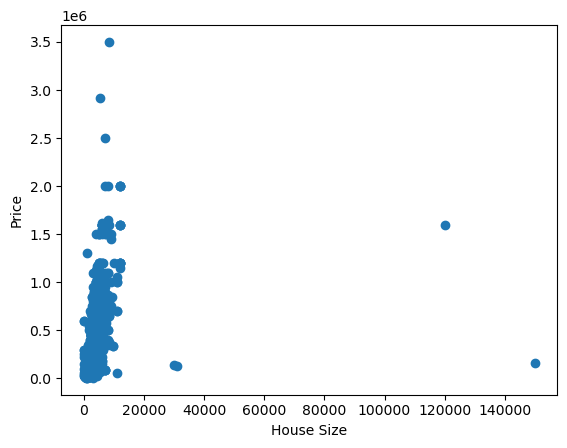

In [260]:
plt.scatter(df5['house_size'], df5['price'])
plt.xlabel('House Size')
plt.ylabel('Price')
plt.show()

In [261]:
# Unrealistic house sizes

df5[(df5['house_size']>25000) | (df5['house_size']<50)]

,ad_added_date,suburb,bedrooms,bathrooms,house_size,land_size,price,is_10_plus_bedrooms,is_10_plus_bathrooms
109,2024-12-15,Colombo 7,5.0,4.0,15.00,3000.0,600000.0,0,0
184,2024-12-14,Colombo 15,2.0,1.0,45.00,25.0,27000.0,0,0
724,2024-12-10,Kohuwala,3.0,3.0,16.00,4000.0,220000.0,0,0
830,12/9/2024,Moratuwa,7.0,4.0,150000.00,7.0,160000.0,0,0
1257,12/6/2024,Dehiwala,3.0,3.0,2.17,805.0,100000.0,0,0
1417,12/4/2024,Colombo 3,4.0,4.0,120000.00,27.0,1600000.0,0,0
1854,11/30/2024,Colombo 7,5.0,4.0,15.00,3000.0,600000.0,0,0
2087,11/27/2024,Moratuwa,3.0,1.0,12.00,12.0,40000.0,0,0
2974,11/23/2024,Colombo 6,5.0,4.0,8.00,2000.0,300000.0,0,0
3735,11/9/2024,Pannipitiya,4.0,2.0,30000.00,12.0,140000.0,0,0


In [262]:
df6 = df5[~((df5['house_size']>25000) | (df5['house_size']<50))]
df6

,ad_added_date,suburb,bedrooms,bathrooms,house_size,land_size,price,is_10_plus_bedrooms,is_10_plus_bathrooms
0,2024-12-15,Mount Lavinia,5.0,4.0,2800.0,8.0,320000.0,0,0
1,2024-12-15,Mount Lavinia,2.0,2.0,1000.0,10.0,80000.0,0,0
2,2024-12-15,Dehiwala,5.0,5.0,7000.0,15.0,700000.0,0,0
3,2024-12-15,Malabe,5.0,4.0,3600.0,22.0,120000.0,0,0
4,2024-12-15,Battaramulla,5.0,3.0,3000.0,17.0,350000.0,0,0
...,...,...,...,...,...,...,...,...,...
4626,11/27/2024,Colombo 7,4.0,4.0,2500.0,8.0,300000.0,0,0
4627,10/7/2024,Kotte,4.0,4.0,4900.0,10.0,300000.0,0,0
4628,10/7/2024,Colombo 5,5.0,4.0,4000.0,8.0,300000.0,0,0
4629,11/7/2024,Mount Lavinia,3.0,2.0,1400.0,12.0,100000.0,0,0


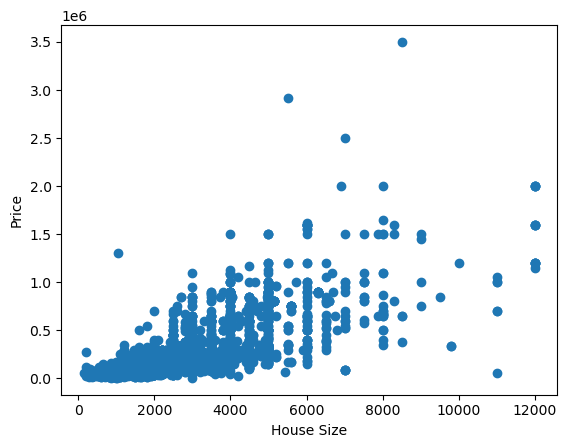

In [263]:
plt.scatter(df6['house_size'], df6['price'])
plt.xlabel('House Size')
plt.ylabel('Price')
plt.show()

In [264]:
# sample sizes by suburb

suburb_counts = df6.groupby('suburb')['suburb'].agg('count').sort_values(ascending = False)
suburb_counts

suburb
Dehiwala         522
Colombo 5        303
Battaramulla     302
Nugegoda         287
Mount Lavinia    225
Talawatugoda     191
Kotte            174
Rajagiriya       147
Boralesgamuwa    133
Malabe           131
Nawala           109
Colombo 6         99
Maharagama        97
Colombo 3         93
Piliyandala       93
Colombo 7         89
Ratmalana         85
Colombo 8         71
Kottawa           66
Colombo 4         65
Pannipitiya       37
Homagama          29
Kohuwala          27
Athurugiriya      27
Moratuwa          24
Kaduwela          17
Kesbewa           16
Angoda            15
Kolonnawa         14
Colombo 2         12
Meegoda           10
Wellampitiya      10
Avissawella        8
Colombo 9          7
Colombo 15         7
Colombo 10         7
Colombo 13         6
Padukka            4
Colombo 12         3
Godagama           2
Hanwella           2
Colombo 14         1
Colombo 1          1
Name: suburb, dtype: int64

In [265]:
#suburbs with low sample sizes

threshold = 10
suburbs_low_sample_size = suburb_counts[suburb_counts < threshold]
suburbs_low_sample_size

suburb
Avissawella    8
Colombo 9      7
Colombo 15     7
Colombo 10     7
Colombo 13     6
Padukka        4
Colombo 12     3
Godagama       2
Hanwella       2
Colombo 14     1
Colombo 1      1
Name: suburb, dtype: int64

In [266]:
# Saving all suburb names to a csv for using when predicting

df_suburbs = pd.DataFrame({'suburbs' : suburb_counts.index.tolist()})
df_suburbs.sort_values('suburbs', inplace = True, ignore_index=True)
df_suburbs.to_csv('suburbs.csv', index = False)
df_suburbs

,suburbs
0,Angoda
1,Athurugiriya
2,Avissawella
3,Battaramulla
4,Boralesgamuwa
5,Colombo 1
6,Colombo 10
7,Colombo 12
8,Colombo 13
9,Colombo 14


In [267]:
df7 = df6.copy()

In [268]:
# labeling suburbs with low sample sizes as "other"

df7['suburb'] = df7['suburb'].apply(lambda x: 'other' if x in suburbs_low_sample_size else x)
df7

,ad_added_date,suburb,bedrooms,bathrooms,house_size,land_size,price,is_10_plus_bedrooms,is_10_plus_bathrooms
0,2024-12-15,Mount Lavinia,5.0,4.0,2800.0,8.0,320000.0,0,0
1,2024-12-15,Mount Lavinia,2.0,2.0,1000.0,10.0,80000.0,0,0
2,2024-12-15,Dehiwala,5.0,5.0,7000.0,15.0,700000.0,0,0
3,2024-12-15,Malabe,5.0,4.0,3600.0,22.0,120000.0,0,0
4,2024-12-15,Battaramulla,5.0,3.0,3000.0,17.0,350000.0,0,0
...,...,...,...,...,...,...,...,...,...
4626,11/27/2024,Colombo 7,4.0,4.0,2500.0,8.0,300000.0,0,0
4627,10/7/2024,Kotte,4.0,4.0,4900.0,10.0,300000.0,0,0
4628,10/7/2024,Colombo 5,5.0,4.0,4000.0,8.0,300000.0,0,0
4629,11/7/2024,Mount Lavinia,3.0,2.0,1400.0,12.0,100000.0,0,0


array([[<Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'house_size'}>,
        <Axes: title={'center': 'land_size'}>],
       [<Axes: title={'center': 'price'}>, <Axes: >]], dtype=object)

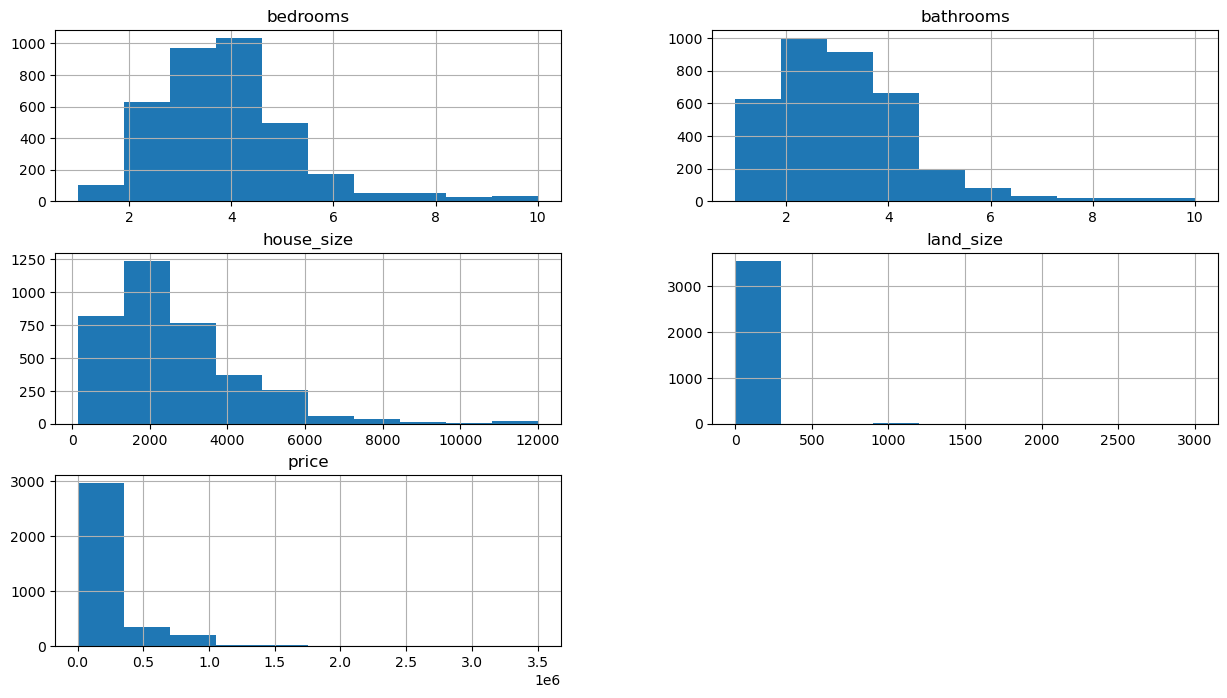

In [270]:
df7[['bedrooms', 'bathrooms', 'house_size', 'land_size', 'price']].hist(figsize=(15,8))

In [271]:
# one hot encoding suburbs

df8 = pd.get_dummies(df7, columns = ['suburb'], dtype = int)
df8

,ad_added_date,bedrooms,bathrooms,house_size,land_size,price,is_10_plus_bedrooms,is_10_plus_bathrooms,suburb_Angoda,suburb_Athurugiriya,...,suburb_Mount Lavinia,suburb_Nawala,suburb_Nugegoda,suburb_Pannipitiya,suburb_Piliyandala,suburb_Rajagiriya,suburb_Ratmalana,suburb_Talawatugoda,suburb_Wellampitiya,suburb_other
0,2024-12-15,5.0,4.0,2800.0,8.0,320000.0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,2024-12-15,2.0,2.0,1000.0,10.0,80000.0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,2024-12-15,5.0,5.0,7000.0,15.0,700000.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2024-12-15,5.0,4.0,3600.0,22.0,120000.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2024-12-15,5.0,3.0,3000.0,17.0,350000.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4626,11/27/2024,4.0,4.0,2500.0,8.0,300000.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4627,10/7/2024,4.0,4.0,4900.0,10.0,300000.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4628,10/7/2024,5.0,4.0,4000.0,8.0,300000.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4629,11/7/2024,3.0,2.0,1400.0,12.0,100000.0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [272]:
df8.shape

(3568, 41)

In [273]:
# dropping one column from one hot encoded categories

df9 = df8.drop(['suburb_other'], axis=1)
df9

,ad_added_date,bedrooms,bathrooms,house_size,land_size,price,is_10_plus_bedrooms,is_10_plus_bathrooms,suburb_Angoda,suburb_Athurugiriya,...,suburb_Moratuwa,suburb_Mount Lavinia,suburb_Nawala,suburb_Nugegoda,suburb_Pannipitiya,suburb_Piliyandala,suburb_Rajagiriya,suburb_Ratmalana,suburb_Talawatugoda,suburb_Wellampitiya
0,2024-12-15,5.0,4.0,2800.0,8.0,320000.0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,2024-12-15,2.0,2.0,1000.0,10.0,80000.0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2024-12-15,5.0,5.0,7000.0,15.0,700000.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2024-12-15,5.0,4.0,3600.0,22.0,120000.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2024-12-15,5.0,3.0,3000.0,17.0,350000.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4626,11/27/2024,4.0,4.0,2500.0,8.0,300000.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4627,10/7/2024,4.0,4.0,4900.0,10.0,300000.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4628,10/7/2024,5.0,4.0,4000.0,8.0,300000.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4629,11/7/2024,3.0,2.0,1400.0,12.0,100000.0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [274]:
df9.drop(['ad_added_date'], axis=1, inplace = True)
df9

,bedrooms,bathrooms,house_size,land_size,price,is_10_plus_bedrooms,is_10_plus_bathrooms,suburb_Angoda,suburb_Athurugiriya,suburb_Battaramulla,...,suburb_Moratuwa,suburb_Mount Lavinia,suburb_Nawala,suburb_Nugegoda,suburb_Pannipitiya,suburb_Piliyandala,suburb_Rajagiriya,suburb_Ratmalana,suburb_Talawatugoda,suburb_Wellampitiya
0,5.0,4.0,2800.0,8.0,320000.0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,2.0,2.0,1000.0,10.0,80000.0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,5.0,5.0,7000.0,15.0,700000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5.0,4.0,3600.0,22.0,120000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5.0,3.0,3000.0,17.0,350000.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4626,4.0,4.0,2500.0,8.0,300000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4627,4.0,4.0,4900.0,10.0,300000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4628,5.0,4.0,4000.0,8.0,300000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4629,3.0,2.0,1400.0,12.0,100000.0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [275]:
df9.to_csv('preprocessed_data.csv', index = False)